# Luokittelu - K-Means Cluster

Klassinen esimerkki luokittelusta on kurjenmiekkojen (iris) luokittelu kolmeen lajiin (setosa, versicolor, virginica) 
terä- (petal) ja verholehtien (sepal) koon mukaan. Seuraavassa kokeilen lajien tunnistamista ilman opetusdataa.

<h3>K-Means Cluster -menetelmän idea</h3>

Menetelmän tarkoituksena on löytää datasta K-kappaletta ryhmiä (klustereita, segmenttejä). Ryhmät muodostetaan ryhmäkeskusten ympärille.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Vaikuttaa kaavioiden ulkoasuun:
sns.set()

In [2]:
#Esimerkkiaineisto löytyy seaborn-kirjastosta:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#Feature-matriisi on iris-data ilman species-muuttujaa:
X = iris.drop('species', axis=1)

In [4]:
#Gaussian naive bayes -mallin tuonti:
from sklearn.cluster import KMeans

#Mallin sovitus:
malli = KMeans(n_clusters=3)
malli.fit(X)

#Ryhmien keskukset (sepal_length, sepal_width, petal_length, petal_width):
malli.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [5]:
#Ryhmiin kuulumiset:
X['K'] = malli.predict(X)
pd.crosstab(X['K'], 'lkm')

col_0,lkm
K,
0,38
1,50
2,62


In [6]:
#Tunnuslukuja ryhmittäin:
X.groupby('K').describe().T

K                           0          1          2
sepal_length count  38.000000  50.000000  62.000000
             mean    6.850000   5.006000   5.901613
             std     0.494155   0.352490   0.466410
             min     6.100000   4.300000   4.900000
             25%     6.425000   4.800000   5.600000
             50%     6.700000   5.000000   5.900000
             75%     7.200000   5.200000   6.200000
             max     7.900000   5.800000   7.000000
sepal_width  count  38.000000  50.000000  62.000000
             mean    3.073684   3.428000   2.748387
             std     0.290092   0.379064   0.296284
             min     2.500000   2.300000   2.000000
             25%     2.925000   3.200000   2.500000
             50%     3.000000   3.400000   2.800000
             75%     3.200000   3.675000   3.000000
             max     3.800000   4.400000   3.400000
petal_length count  38.000000  50.000000  62.000000
             mean    5.742105   1.462000   4.393548
             std     0.488590   0.173664   0.508895
             min     4.900000   1.000000   3.000000
             25%     5.425000   1.400000   4.025000
             50%     5.650000   1.500000   4.500000
             75%     6.000000   1.575000   4.800000
             max     6.900000   1.900000   5.100000
petal_width  count  38.000000  50.000000  62.000000
             mean    2.071053   0.246000   1.433871
             std     0.279872   0.105386   0.297500
             min     1.400000   0.100000   1.000000
             25%     1.825000   0.200000   1.300000
             50%     2.100000   0.200000   1.400000
             75%     2.300000   0.300000   1.575000
             max     2.500000   0.600000   2.400000

In [7]:
#Katsotaan miten muodostetut ryhmät suhteutuava lajikkeisiin:
pd.crosstab(X['K'], iris['species'])

species,setosa,versicolor,virginica
K,,,
0,0,2,36
1,50,0,0
2,0,48,14


Muodostetuista ryhmistä ensimmäinen (0) näyttäisi vastaavan Versicoloria, toinen (1) Setosaa ja kolmas (2) Virginicaa. Ensimmäiseen ryhmään on sijoittunut myös useita (14) Virginicoita.

C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\taaak\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in r

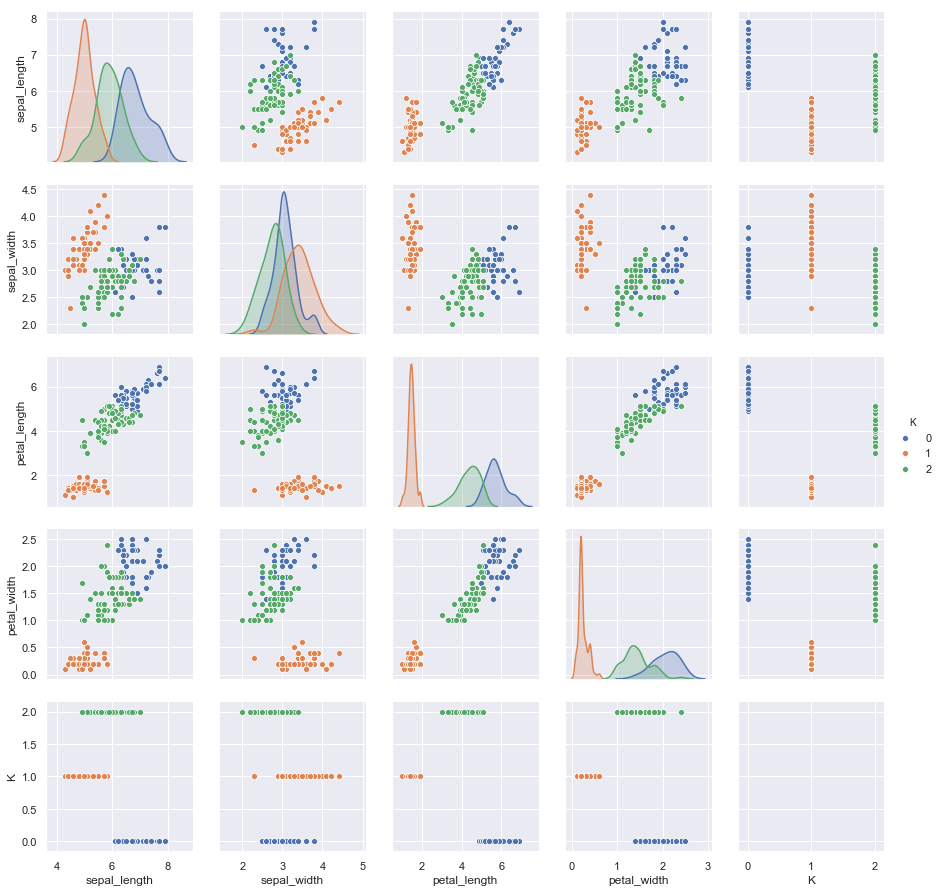

In [8]:
sns.pairplot(X, hue='K')